In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import torch
import os
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader

from tqdm import tqdm

import numpy as np
from sklearn.mixture import GaussianMixture
# torch.manual_seed(1000)

In [8]:
datapath = os.path.join('../', 'data')
filterpath = os.path.join(datapath, 'filters-final', '8_19')

def get_dataset():
  weight_dataset = []
  for f, file in tqdm(enumerate(os.listdir(filterpath))):
    filter = torch.load(os.path.join(filterpath, file), map_location=torch.device('cpu'))
    for i in range(8):
      weight_dataset.append(filter['0.weight'][i][0])
  return weight_dataset

num_images = len(os.listdir(filterpath))
dataset = get_dataset()
dataset = torch.stack(dataset, dim=0).view(-1,25)

X = dataset.detach().clone().numpy()

1407it [00:00, 1779.07it/s]


In [9]:
gmm = GaussianMixture(n_components=2).fit(X)
gmm.means_, gmm.weights_

(array([[ 0.63928263,  0.87025204,  0.96075744,  0.94329809,  0.81370859,
          0.80967939,  1.01851419,  1.07026775,  1.04811645,  0.90203315,
          0.90569408,  1.06888688,  1.1006983 ,  1.06557808,  0.90194257,
          0.91922929,  1.06753041,  1.0862277 ,  1.02917074,  0.82248866,
          0.83246254,  0.96698932,  0.97847316,  0.88049996,  0.6475891 ],
        [-1.01662134, -1.4376669 , -1.59227929, -1.52346821, -1.20155378,
         -1.41885938, -1.78037165, -1.86469005, -1.79843324, -1.46862696,
         -1.56076213, -1.86182289, -1.91004459, -1.84457332, -1.5070076 ,
         -1.48120041, -1.78926408, -1.83539504, -1.72235234, -1.305657  ,
         -1.12857498, -1.42277534, -1.46859889, -1.27800006, -0.82306332]]),
 array([0.54505147, 0.45494853]))

In [10]:
import matplotlib
import matplotlib.pyplot as plt

num_samples = 8
vmin, vmax = -2.5, 2.5
def visualise_filters(filters):
  num_rows = filters.shape[0]
  num_filters = filters.shape[1]
  _, axarr = plt.subplots(num_rows, num_filters, figsize=(int(5*(num_filters//8)), num_rows))
  plt.axis('off')
  for f in range(num_rows):
    filter = filters[f]
    for i in range(num_filters):
      if f < num_rows:
        axarr[f, i].set_axis_off()
        axarr[f, i].imshow(filter[i], interpolation=None, norm=matplotlib.colors.Normalize(vmin=vmin, vmax=vmax, clip=False))
  plt.show()  
  return

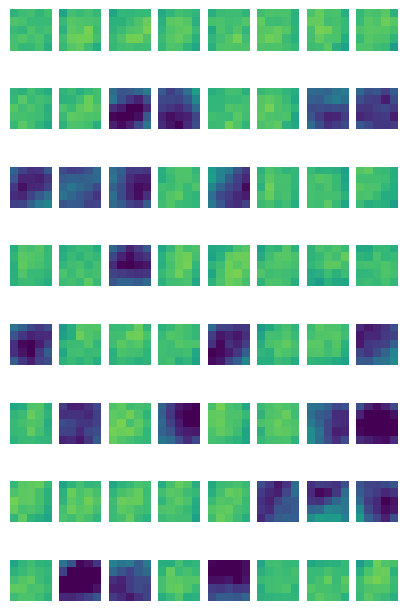

In [11]:
n_samples = 8
n_filters = 8
filters , _ = gmm.sample(n_filters*n_samples)
filters = np.random.permutation(np.reshape(filters, (-1,5,5)))
# print(components.sha)

filters = np.reshape(filters, (n_samples,n_filters,5,5))
visualise_filters(filters)
# components = np.reshape(components, (n_samples,n_filters,-1))